In [101]:
import matplotlib.pyplot as plt
import torch
import timm
import numpy as np
import deepsim_analyzer as da

img = da.io.load_image("../data/raw_immutable/tiny_test_images/adriaen-brouwer_the-bitter-drunk.jpg", return_np=False)

# resize all images to the same size to get consistent magnitudes when summing the activation values.
# the distortion added by doing so shouldnt be too bad
img = img.resize((512, 512))

img_array = np.array(img)[np.newaxis, :]
# img_array = img_array[np.newaxis, :]

img_tensor = torch.tensor(img_array, dtype=torch.float32)
# change to channel first
img_tensor = img_tensor.permute(0,3,1,2)

m = timm.create_model('xception41', pretrained=True)

In [102]:
# there are 12 inception blocks in the model, each makes the h and w smaller but channels bigger
out = m.stem(img_tensor)
out = m.blocks[0](out)
out = m.blocks[1](out)
out = m.blocks[2](out)
# out = m.blocks[3](out)
# out = m.blocks[4](out)
out.shape

torch.Size([1, 728, 32, 32])

min: -7.464397430419922, max: 12.156536102294922
total absolute activation strength: 2396.22509765625


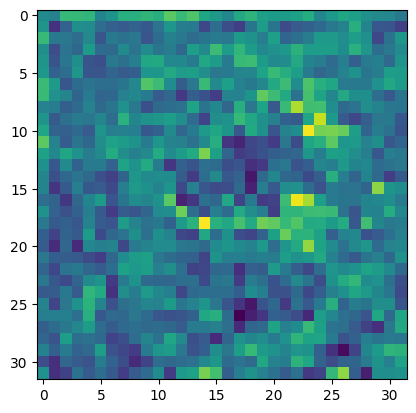

min: -1.5315179824829102, max: 4.266805171966553
total absolute activation strength: 338.5728454589844


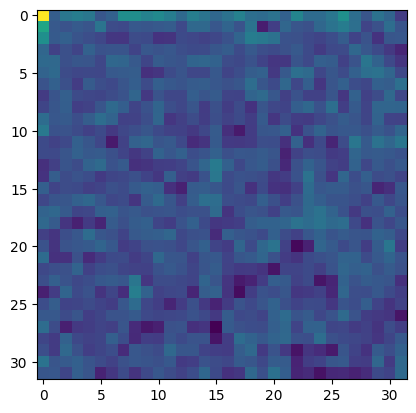

min: -9.023548126220703, max: 5.289336204528809
total absolute activation strength: 1837.703857421875


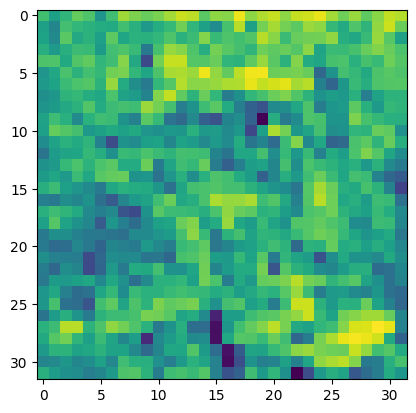

min: -3.5243184566497803, max: 2.0419692993164062
total absolute activation strength: 947.4835205078125


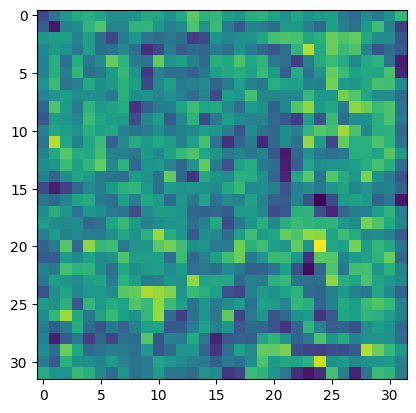

min: -7.7533063888549805, max: 7.269841194152832
total absolute activation strength: 1990.960693359375


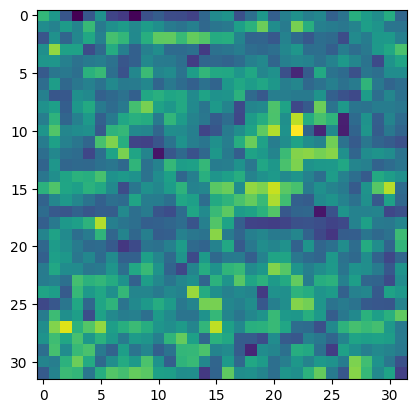

In [103]:
filter_idx = 1

for i in range(5):
    filter_idx = i
    plottable = out.detach().numpy().squeeze()
    print(f"min: {np.min(plottable[filter_idx])}, max: {np.max(plottable[filter_idx])}")
    print(f"total absolute activation strength: {np.sum(np.absolute(plottable[filter_idx]))}")
    plt.imshow(plottable[filter_idx])
    plt.show()

In [104]:
m

XceptionAligned(
  (stem): Sequential(
    (0): ConvNormAct(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
    (1): ConvNormAct(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
  )
  (blocks): Sequential(
    (0): XceptionModule(
      (shortcut): ConvNormAct(
        (conv): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (bn): BatchNormAct2d(
          128, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): Identity()
        )
      )
      (stack): Sequential(
     